<a href="https://colab.research.google.com/github/tskmr/Reliability/blob/main/lecture10_(0621).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10回 一定ストレスモデルの点推定（打切りあり）の演習

## 例: ショックアブソーバの故障時間

### データの読み込み

In [78]:
library(tidyverse)
d = read.csv("ShockAbsorber.csv") # ショックアブソーバの故障時間データ
d %>% head(10)

,Kilometers,Failure.Mode,Censoring.Indicator
,<int>,<chr>,<chr>
1,6700,Mode1,Failed
2,6950,Censored,Censored
3,7820,Censored,Censored
4,8790,Censored,Censored
5,9120,Mode2,Failed
6,9660,Censored,Censored
7,9820,Censored,Censored
8,11310,Censored,Censored
9,11690,Censored,Censored


In [79]:
d$Censoring.Indicator=="Failed"
as.numeric(d$Censoring.Indicator=="Failed")

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[25] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[37] FALSE FALSE

[1] 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0

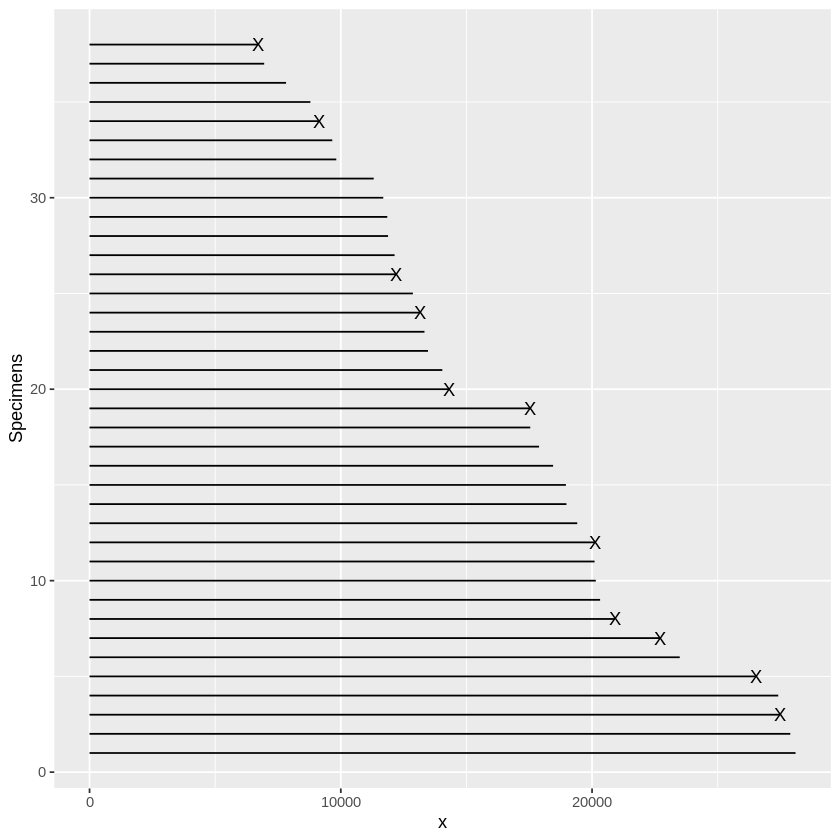

In [80]:
d$dj = as.numeric(d$Censoring.Indicator=="Failed")
d$nj = rev(seq(nrow(d)))
d %>%
  ggplot(aes(0, nj)) + geom_segment(aes(xend = Kilometers, yend = nj)) +
geom_text(aes(x = Kilometers, label = ifelse(dj == 1, "X", ""))) +
ylab("Specimens")

### 最尤推定値の算出

In [81]:
sum(d$dj)

[1] 11

In [82]:
nrow(d)-sum(d$dj)

[1] 27

In [83]:
sum(d$Kilometers)

[1] 625000

In [84]:
hat.mu = log(sum(d$Kilometers)/sum(d$dj))
hat.mu

[1] 10.94761

漸近分散の算出

In [85]:
aVar = 1/sum(d$dj)
aVar

[1] 0.09090909

近似信頼区間

In [86]:
alpha = 0.05
c(hat.mu - qnorm(1-alpha/2) * sqrt(aVar), hat.mu + qnorm(1-alpha/2) * sqrt(aVar) )

[1] 10.35666 11.53856

### 最尤推定値の算出（数値計算による方法）

In [67]:
dsev <- function(z){
  exp(z-exp(z))
}
psev <- function(z){
  1-exp(-exp(z))
}
Ft <- function(t, mu){ # 指数分布の累積分布関数
  psev(log(t)-mu)
}
ft <- function(t, mu){ # 指数分布の確率密度関数
  1/t * dsev(log(t)-mu)
}
l_i = function(x, par, n_d, n_r){ # 1サンプルの対数尤度
  n_d * log(ft(x, par)) + n_r * log(1-Ft(x, par))
}
loglikelihood = function(x, n_d, n_r){
  function(par){
    sum(l_i(x, par, n_d, n_r))
  }
}
l = loglikelihood(d$Kilometers, d$dj, 1-d$dj) # 対数尤度関数

In [68]:
l

function(par){
    sum(l_i(x, par, n_d, n_r))
  }
<environment: 0x5571c0c31158>

In [69]:
l(12)
l(21)

[1] -135.8401

[1] -231.0005

In [70]:
optim(20, l, control = list(fnscale=-1), hessian = TRUE)

Warning message in optim(20, l, control = list(fnscale = -1), hessian = TRUE):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


-11.00381


In [71]:
optim(30, l, control = list(fnscale=-1), hessian = TRUE)

Warning message in optim(30, l, control = list(fnscale = -1), hessian = TRUE):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


-10.99307


In [72]:
res <- optim(11, l, control = list(fnscale=-1), hessian = TRUE)
res

Warning message in optim(11, l, control = list(fnscale = -1), hessian = TRUE):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


-11.00274


In [73]:
res$par

[1] 10.94736

In [74]:
res$hessian

-11.00274


In [75]:
hat.mu = res$par
hat.mu

[1] 10.94736

In [76]:
H_n = res$hessian
oim <- -H_n
hat.aVar <- solve(oim)
hat.aVar

0.09088648


### 近似信頼区間

In [77]:
alpha = 0.05
c(hat.mu - qnorm(1-alpha/2) * sqrt(hat.aVar), hat.mu + qnorm(1-alpha/2) * sqrt(hat.aVar) )

[1] 10.35649 11.53824

## LFP

In [38]:
x = c(0.1, 0.1, 0.15, 0.6, 0.8, 0.8, 1.2, 2.5, 3, 4,
4, 6, 10, 10, 12.5, 20, 20, 43, 43, 48,
48, 54, 74, 84, 94, 168, 263, 593)
d1 = data.frame(t = x, cens = rep(1, length(x)))
d0 = data.frame(t = rep(1370, 4128), cens = rep(0, 4128))
d = rbind(d1, d0)
d

t,cens
<dbl>,<dbl>
0.10,1
0.10,1
0.15,1
0.60,1
0.80,1
0.80,1
1.20,1
2.50,1
3.00,1


In [41]:
dsev <- function(z){
  exp(z-exp(z))
}
psev <- function(z){
  1-exp(-exp(z))
}
Ft <- function(t, mu, sigma){
  psev((log(t)-mu)/sigma)
}
ft <- function(t, mu, sigma){
  1/t/sigma * dsev((log(t)-mu)/sigma)
}
l_i = function(x, par, delta){
  mu = par[1]
  sigma = par[2]
  pu = par[3]
  delta * log(pu * ft(x, mu, sigma)) + (1-delta) * log(1 - pu * Ft(x, mu, sigma))
}
loglikelihood = function(x, delta){
  function(par){
    sum(l_i(x, par, delta))
  }
}
l = loglikelihood(d$t, d$cens)

In [43]:
l(c(3, 1, 0.5))

[1] -3044.765

In [44]:
res <- optim(c(3, 1, 0.5), l, control = list(fnscale=-1), hessian = TRUE)
res

Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs pr

-6.541135,-2.372721,15.16101
-2.372721,-11.597908,29.15508
15.161010,29.155081,-647672.44203


In [45]:
res <- optim(c(3, 2, 0.01), l, control = list(fnscale=-1), hessian = TRUE)
res

Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”
Warning message in log(pu * ft(x, mu, sigma)):
“NaNs produced”


-6.541505,-2.365017,15.17675
-2.365017,-11.607516,29.18363
15.176754,29.183631,-648604.58404


In [46]:
H_n = res$hessian
oim <- -H_n
hat.aVar <- solve(oim)
hat.aVar

1.650300e-01,-3.361876e-02,2.348892e-06
-3.361876e-02,9.300941e-02,3.398262e-06
2.348892e-06,3.398262e-06,1.541979e-06


In [47]:
res$par

[1] 3.345075807 2.016464092 0.006743884

In [48]:
hat.theta = res$par
hat.var.theta = diag(hat.aVar)

In [50]:
alpha = 0.05
c(hat.theta[1] - qnorm(1-alpha/2) * sqrt(hat.var.theta[1]),
hat.theta[1] + qnorm(1-alpha/2) * sqrt(hat.var.theta[1]) )

[1] 2.548862 4.141289

In [51]:
c(hat.theta[2] - qnorm(1-alpha/2) * sqrt(hat.var.theta[2]),
hat.theta[2] + qnorm(1-alpha/2) * sqrt(hat.var.theta[2]) )

c(hat.theta[3] - qnorm(1-alpha/2) * sqrt(hat.var.theta[3]),
hat.theta[3] + qnorm(1-alpha/2) * sqrt(hat.var.theta[3]) )

[1] 1.418725 2.614203

[1] 0.004310071 0.009177698